In [18]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [19]:
image_array = np.array(Image.open("trikoupi6_low.png"))
copied = np.copy(image_array)

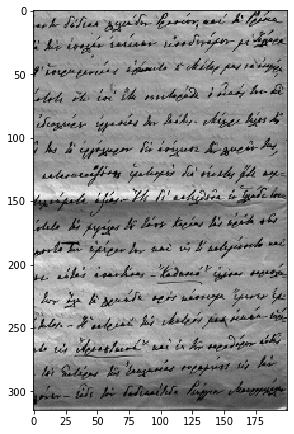

In [20]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.show()

In [21]:
# Εδώ θα πραγματοποιώ την κατάτμηση της εικόνας pixel by pixel.
def threshold_image(row, col, threshold):
    if image_array[row][col] < threshold:
        image_array[row][col] = 0
    else:
        image_array[row][col] = 255
#

In [22]:
# Εδώ θα ελέγχω τα όρα του πίνακα μου. Όταν θα βγαίνω εκτός θα το επαναφέρω είτε στο 0 είτε στο maximum.
def check_boundaries(rows, cols, row, col, d):
    x = row - d
    y = row + d
    z = col - d
    w = col + d
    if x < 0:
        x = 0
    if z < 0:
        z = 0
    if y > rows:
        y = rows
    if w > cols:
        w = cols
    return (x, y, z, w)

In [23]:
# Σε αυτή την συνάρτηση θα υπολογίζω την αντικεινική του Otsu. δίνοντας έναν πίνακα από τους γείτονες και ένα K για την κατάτμηση:
def calc_obj_Otsu(array, k):
    first_part = array[array < k]
    second_part = array[array >= k]
    middle1 = np.mean(first_part)
    middle2 = np.mean(second_part)
    middle = np.mean(array.flatten())
    pi1 = len(first_part) / (len(first_part) + len(second_part))
    pi2 = len(second_part) / (len(first_part) + len(second_part))
    calc = pi1 * (middle1 - middle)**2 + pi2 * (middle2 - middle)**2
    return calc
#

In [24]:
''' Αυτή η συνάρτηση θα καλείται για να γίνει η κατάτμηση της εικόνας. Έχει μία παράμετρο d 
που είναι το window size που έχει επιλέξει ο χρήστης. 
Κρατάμε ένα αντίγραφο της εικόνας σε μία μεταβλητή copied. 
Για κάθε pixel της εικόνας μας θα ελέγχω τα όρια με την παραπάνω συνάρτηση, 
θα κρατάω τους γείτονες που πρέπει 
(για παράδειγμα το pixel image_array[0][0] για window_size = 1 θα έχει 4 τιμές.)
Επόμενο βήμα είναι η εύρεση της καλύτερης τιμής για κατάτμηση.
Από 1 έως 256 θα καλείται η αντικειμενική συνάρτηση που έχουμε γράψει παραπάνω σε συνάρτηση, 
θα βρίσκει την καλύτερη τιμή και θα αποθηκεύει την τιμή της καλύτερης δυνατής κατάτμησης. 
Αφού την βρει, καλεί την συνάρτηση για να κάνει το threshold στο συγκεκριμένο pixel της 
εικόνας μας με την παραπανάω συνάρτηση.
'''
def otsu_Algorithm(d):
    best_value = 0
    best_k = 0
    rows = image_array.shape[0]
    cols = image_array.shape[1]
    for row in range(rows):
        for col in range(cols):
            (x, y, z, w) = check_boundaries(rows, cols, row, col, d)
            arr = np.array(copied[x:y+1, z:w+1])
            for i in range(1, 256):
                obj_otsu = calc_obj_Otsu(arr, i)
                if obj_otsu > best_value:
                    best_k = i
                    best_value = obj_otsu
            threshold_image(row, col, best_k)
#

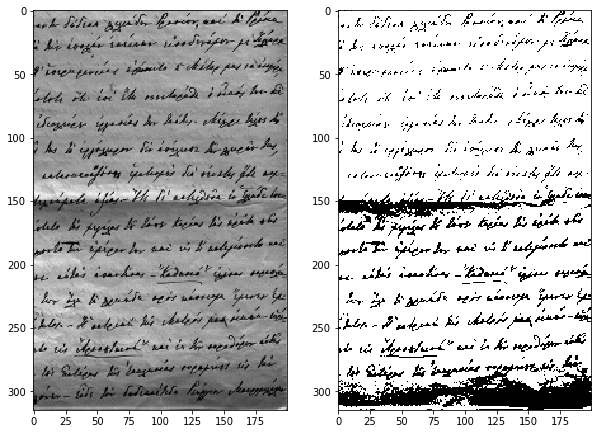

In [25]:
# Είμαστε έτοιμοι να τρέξουμε τον αλγόριθμο και να εξεταστεί:
window_size = 2
otsu_Algorithm(window_size)

fig = plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(copied, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(image_array, cmap='gray')
plt.show()